In [1]:
import os
import glob
import datetime
import numpy as np
import pandas as pd
import xarray as xr
import sys
sys.path.append('/portal1/dell/li-b/multiregression/')

from osgeo import gdal
#from gistool import rasterize
import pyhdf
from pyhdf.SD import SD
import geopandas as gpd
import rasterio

from scipy import stats
from scipy import integrate
from numpy import exp
import math
from pymannkendall import original_test as mk

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as mticker
from matplotlib import pyplot
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
import cartopy.feature as cfeature
import cartopy.io.shapereader as shapereader

In [4]:
a = xr.open_dataset('/portal1/dell/li-b/multiregression/coe_pre.nc')
a1 = a['vari'].values
a2 = np.flip(a1, axis=0)
b = xr.open_dataset('/portal1/dell/li-b/multiregression/coe_rn.nc')
b1 = b['vari'].values
b2 = np.flip(b1, axis=0)

c = xr.open_dataset('/portal1/dell/li-b/multiregression/coe_pre2.nc')
c1 = c['vari'].values
c2 = np.flip(c1, axis=0)

d = xr.open_dataset('/portal1/dell/li-b/multiregression/coe_rn2.nc')
d1 = d['vari'].values
d2 = np.flip(d1, axis=0)

e = xr.open_dataset('/portal1/dell/li-b/multiregression/coe_pre1.nc')
e1 = e['vari'].values
e2 = np.flip(e1, axis=0)

f = xr.open_dataset('/portal1/dell/li-b/multiregression/coe_rn1.nc')
f1 = f['vari'].values
f2 = np.flip(f1, axis=0)

shp_river = '/portal1/dell/li-b/multiregression/allrivers1.shp'
shp_bound = '/portal1/dell/li-b/multiregression/bound1.shp'

/home/li-b/.conda/envs/lbn/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/li-b/.conda/envs/lbn/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/li-b/.conda/envs/lbn/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/li-b/.conda/envs/lbn/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

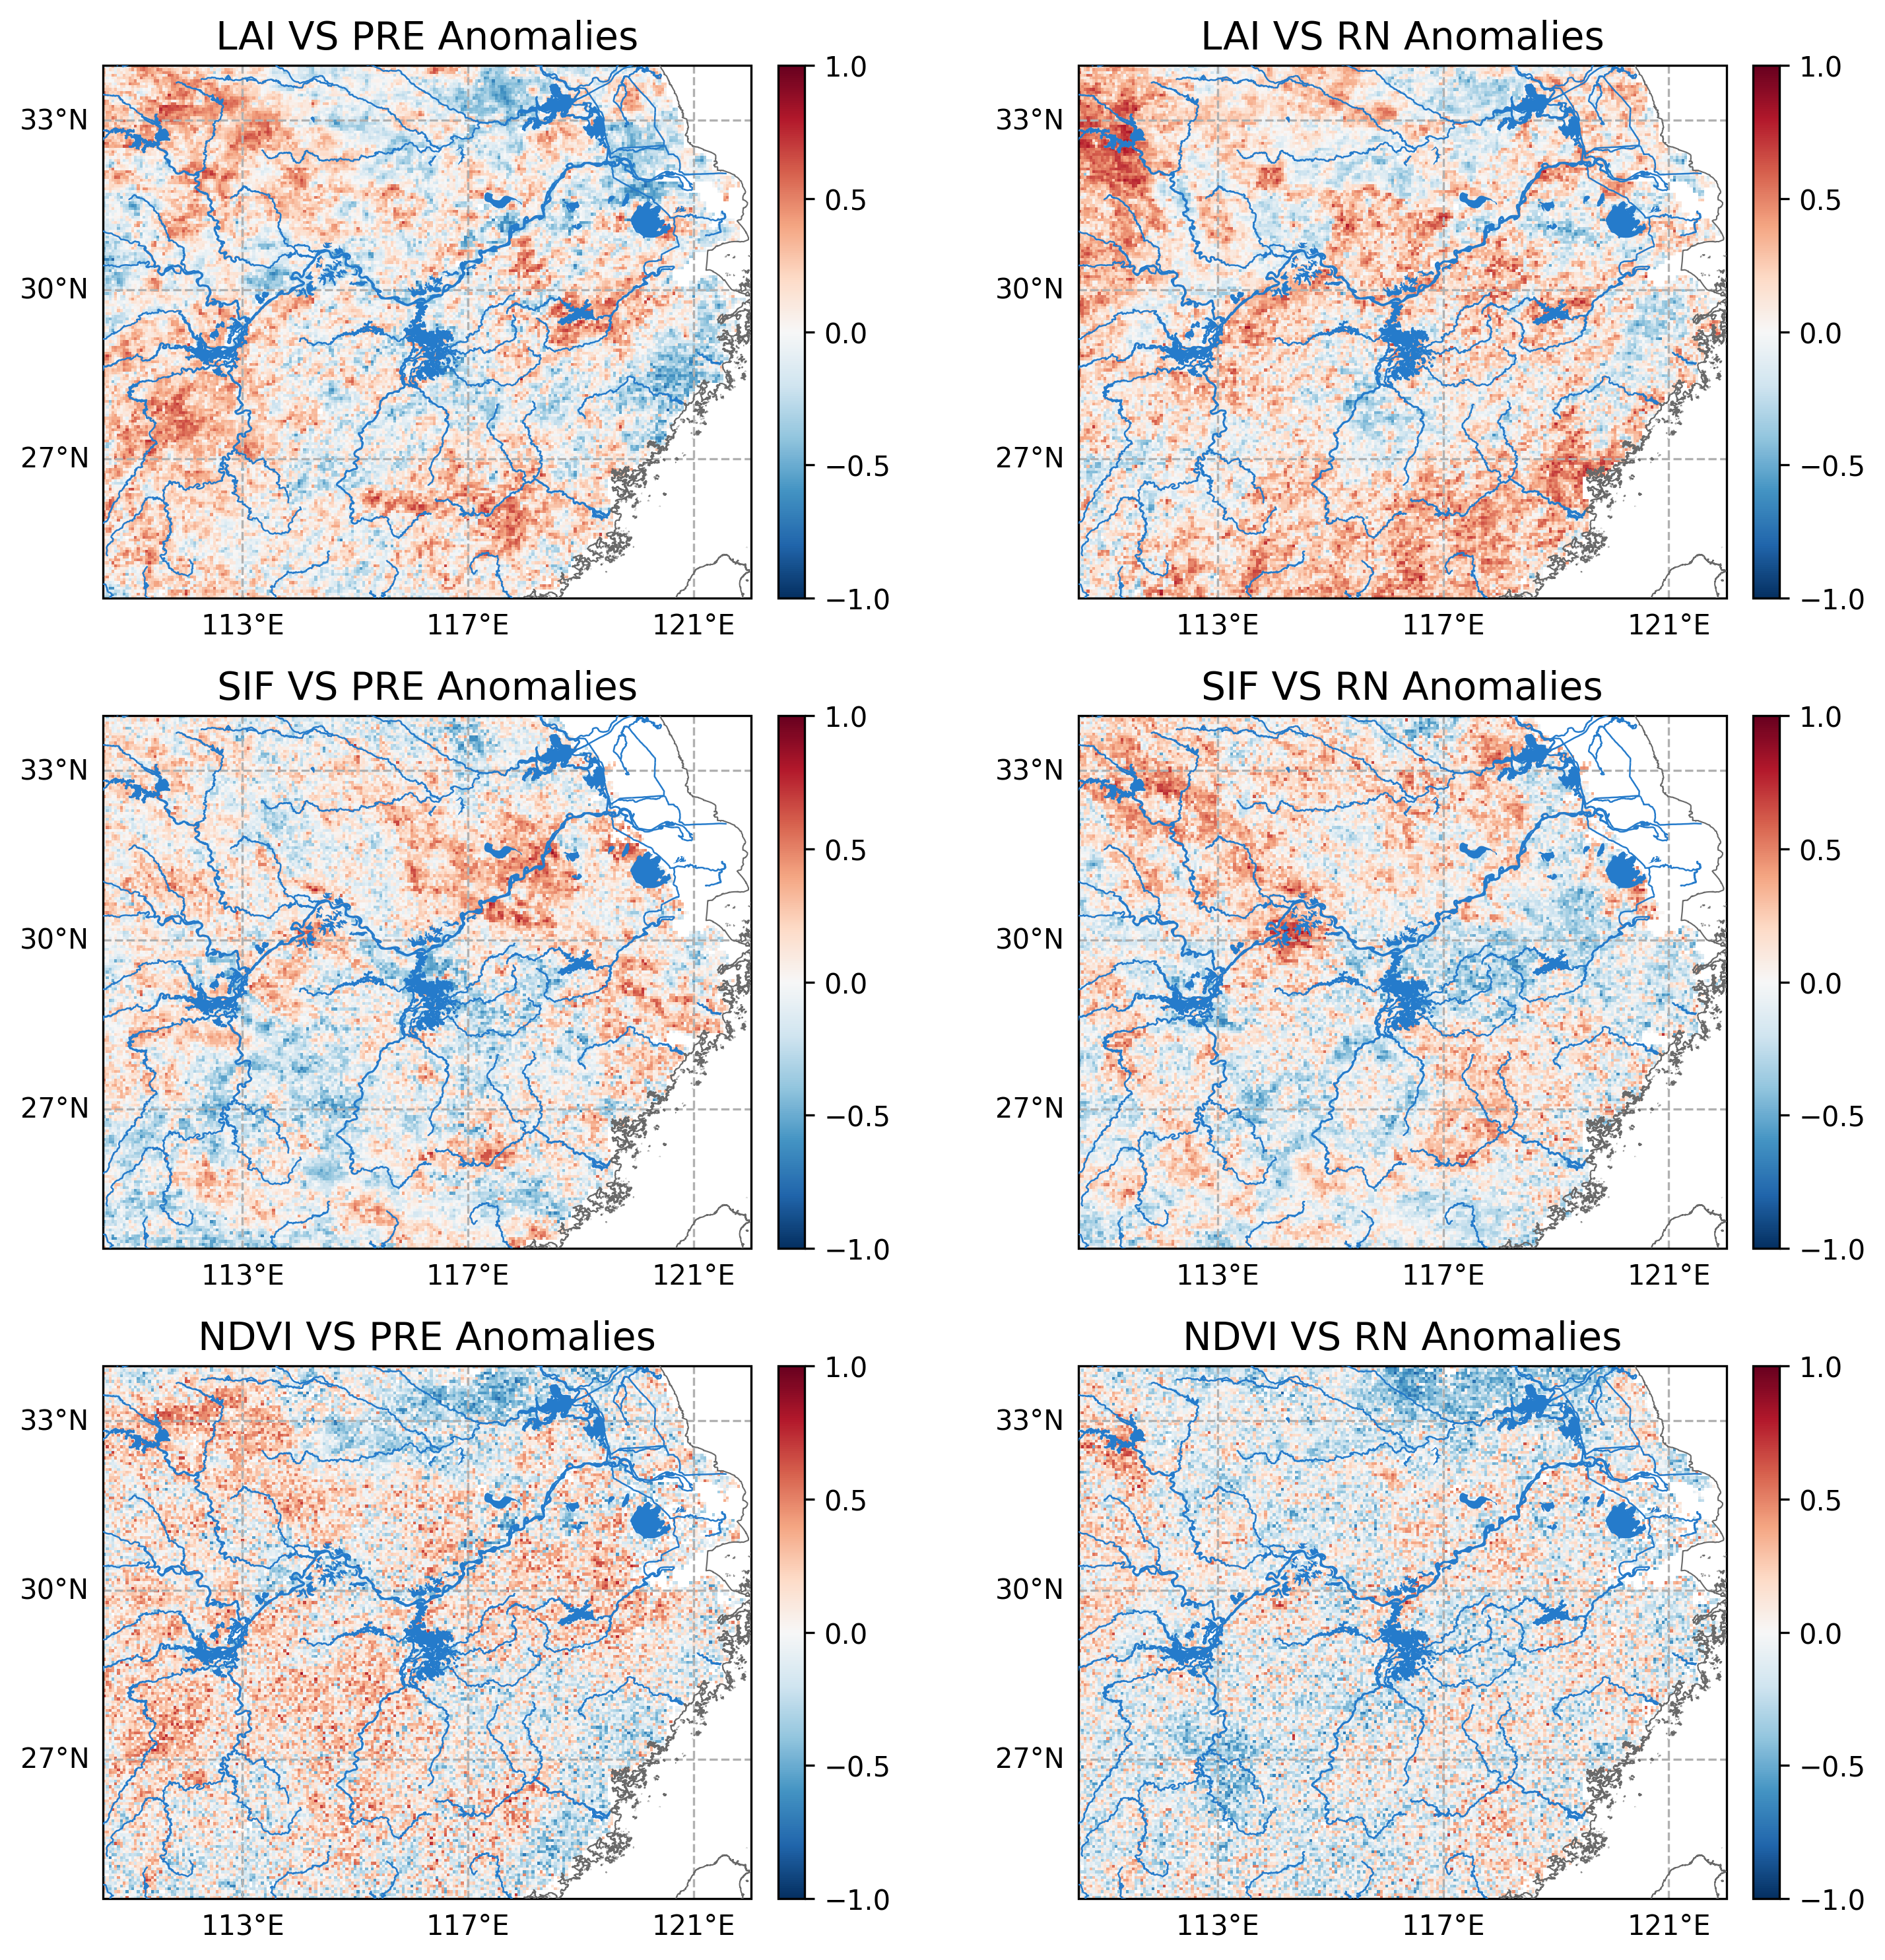

In [9]:
latitude, longitude = a.lat.values, a.lon.values
extent=[longitude.min(), longitude.max(), latitude.min(), latitude.max()]
lon_lc = np.linspace(110.5,122,231)
lat_lc = np.linspace(24.5,34,190)

fig, axes = plt.subplots(3, 2, figsize=(10,10), dpi=300, subplot_kw={'projection': ccrs.PlateCarree()})
x_ticks = np.arange(109, 124, 4)  # Longitude ticks every 3 degrees
y_ticks = np.arange(24, 34, 3)    # Latitude ticks every 2 degrees

axes_flat = axes.flatten()
data = [a2, b2, c2, d2, e2,f2]  # Replace with your actual data for the subplots
title = ['LAI VS PRE Anomalies', 'LAI VS RN Anomalies', 'SIF VS PRE Anomalies','SIF VS RN Anomalies','NDVI VS PRE Anomalies','NDVI VS RN Anomalies']
vmax = 1
vmin = -1
cmap = 'RdBu_r'
for i, ax in enumerate(axes_flat):
    if i < len(data):  # Ensure we don't exceed the number of data arrays
        ax.set_extent(extent, crs=ccrs.Geodetic())
        pcm = ax.pcolormesh(lon_lc, lat_lc, data[i], transform=ccrs.PlateCarree(), cmap=cmap, vmin=vmin, vmax=vmax)
        gridlines = ax.gridlines(draw_labels=True, linestyle='--')
        gridlines.xlabels_top = None
        gridlines.ylabels_right = None
        gridlines.xlocator = mticker.FixedLocator(x_ticks)
        gridlines.ylocator = mticker.FixedLocator(y_ticks)
        # Read and plot the boundary shapefile
        reader_bound = shapereader.Reader(shp_bound)
        geometries_bound = list(reader_bound.geometries())
        ax.add_geometries(geometries_bound, crs=ccrs.PlateCarree(), edgecolor='dimgrey', facecolor='none', lw=0.5,zorder=3)
        # Read and plot the river shapefile
        reader_river = shapereader.Reader(shp_river)
        geometries_river = list(reader_river.geometries())
        ax.add_geometries(geometries_river, crs=ccrs.PlateCarree(), edgecolor='#257bcb', facecolor='none', lw=0.6,zorder=4)
        ax.add_feature(cfeature.LAKES, edgecolor='none', facecolor='#257bcb',zorder= 15)
        
        ax.set_title(title[i], fontsize=14)
        cbar = fig.colorbar(pcm, ax=ax, orientation='vertical', pad=0.03, aspect=20)
        ticks = np.linspace(vmin, vmax, 5)
        cbar.set_ticks(ticks)

# plt.subplots_adjust(wspace=0.1)  # Adjust vertical spacing between subplots
plt.tight_layout()
plt.savefig('/portal1/dell/li-b/manu1_fig/fig6a.png', dpi=300, bbox_inches='tight') 
plt.show()